# Visualize Results
## Activity during Stimulus 1 presentation

In [1]:
import numpy as np
import pandas as pd #Pandas has multiple functions, including providing 'data_frame' objects that can be used for visualizing and analyzing data
from matplotlib import pyplot as plt

In [2]:
stim1_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("output_spikes_posttraining_stim1SpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("output_spikes_posttraining_stim1SpikeTimes.bin", dtype=np.float32),
  }
)

#NB Pandas will generate a 'data-frame', where each row in this case has a name (ids or times), and the 
#columns in those rows contain the values of interest

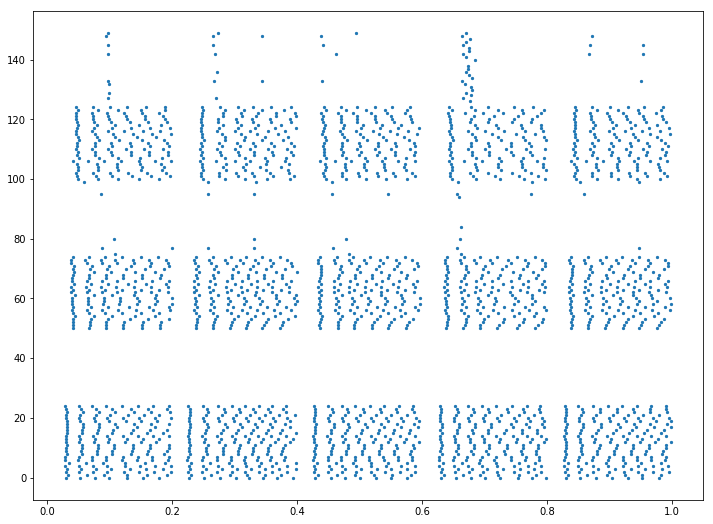

In [3]:
plt.figure(figsize=(12,9))
mask = stim1_df["times"] <1.0 #Restrict plotted spikes to a particular time period
#mask = ((stim1_df["ids"] > 0) & (stim1_df["ids"] <= 1024)) #Restrict plotted spikes to a particular layer
plt.scatter(stim1_df["times"][mask], stim1_df["ids"][mask], s=5)
plt.show()

## Activity during Stimulus 2 presentation

In [4]:
stim2_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("output_spikes_posttraining_stim2SpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("output_spikes_posttraining_stim2SpikeTimes.bin", dtype=np.float32),
  }
)


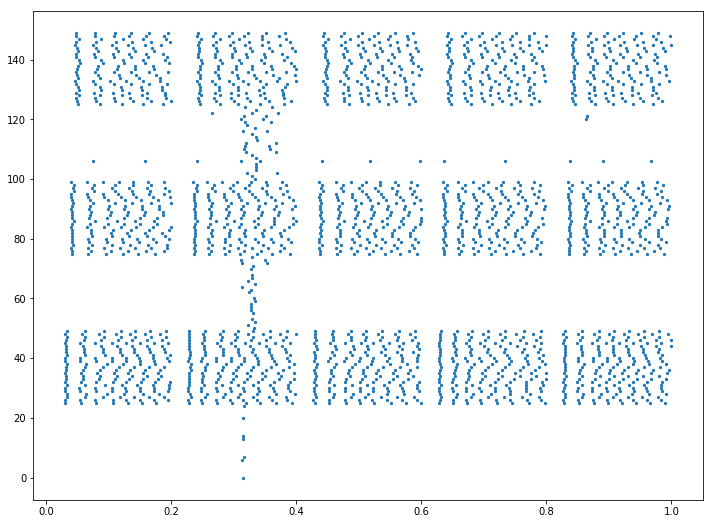

In [5]:
plt.figure(figsize=(12,9))
mask = stim2_df["times"] <1.0
#mask = ((stim2_df["ids"] > 2048) & (stim2_df["ids"] <= 2048+1024))
plt.scatter(stim2_df[:]["times"][mask], stim2_df[:]["ids"][mask], s=5)
plt.show()

## Activity of Stimulus 1 Poisson input

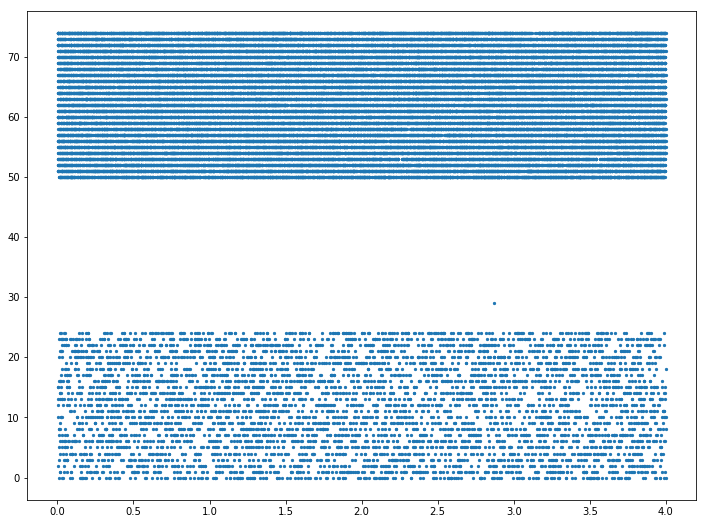

In [6]:
input1_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("input_Poisson_stim1SpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("input_Poisson_stim1SpikeTimes.bin", dtype=np.float32),
  }
)

plt.figure(figsize=(12,9))
mask = input1_df["times"] <4.0
plt.scatter(input1_df["times"][mask], input1_df["ids"][mask], s=5)

plt.show()

## Activity of Stimulus 2 Poisson input

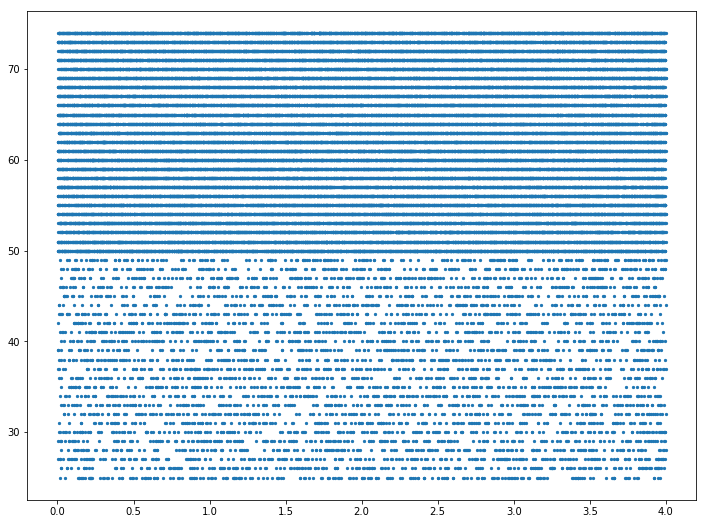

In [7]:
input2_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("input_Poisson_stim2SpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("input_Poisson_stim2SpikeTimes.bin", dtype=np.float32),
  }
)

plt.figure(figsize=(12,9))
mask = input2_df["times"] <4.0
plt.scatter(input2_df["times"][mask], input2_df["ids"][mask], s=5)

plt.show()

## Plot Firing Rate Distributions

In [8]:
numinhneurons = (5*5*2*3)
inhfrs_stim1 = np.bincount(stim1_df["ids"].values, minlength=numinhneurons)
inhfrs_stim2 = np.bincount(stim2_df["ids"].values, minlength=numinhneurons)

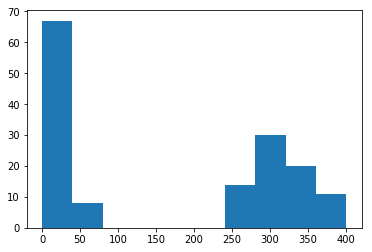

In [9]:
plt.hist(inhfrs_stim1)
plt.show()

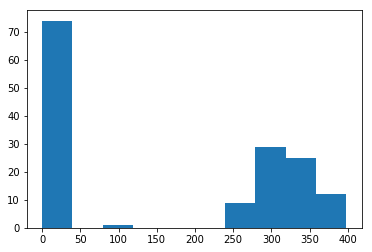

In [10]:
plt.hist(inhfrs_stim2)
plt.show()

## Firing Rate Difference For the Two Stimuli

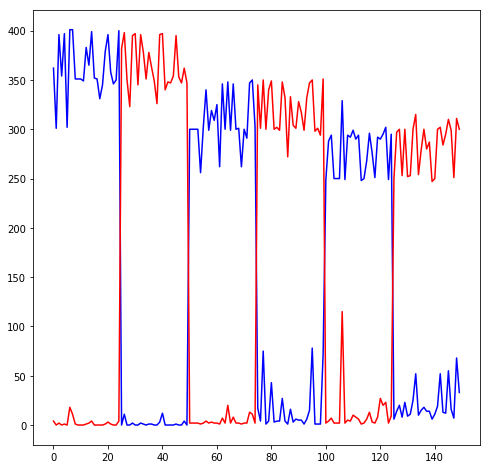

In [11]:
plt.figure(figsize=(8,8))
plt.plot(inhfrs_stim1, color='b')
plt.plot(inhfrs_stim2, color='r')
plt.show()

## Distribution of Weights

In [16]:
num_epochs = 5

weights_df = pd.DataFrame(
  data = {
      "weights" : np.fromfile("Epoch" + str(num_epochs-1) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32),
      "pres" : np.fromfile("Sandbox_NetworkPresynapticIDs.bin", dtype=np.int32),
      "post" : np.fromfile("Sandbox_NetworkPostsynapticIDs.bin", dtype=np.int32)
  }
)

In [22]:
input_weight_evolution = []
inh_weight_evolution = []

inputmask = (weights_df["pres"] < 0) &(weights_df["pres"] >= -100) 
inhmask = (weights_df["pres"] > 0) &(weights_df["post"] > 0) 

for e in range(num_epochs):
    input_weight_evolution.append(np.fromfile("Epoch" + str(e) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32)[inputmask])
    inh_weight_evolution.append(np.fromfile("Epoch" + str(e) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32)[inhmask])


input_mean_weight_evolution = np.mean(np.asarray(input_weight_evolution), axis=1)
inh_mean_weight_evolution = np.mean(np.asarray(inh_weight_evolution), axis=1)



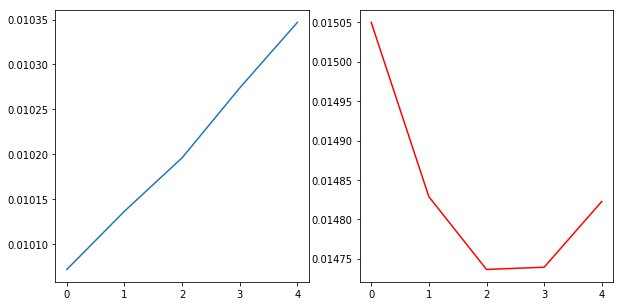

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(input_mean_weight_evolution)

plt.subplot(1,2,2)
plt.plot(inh_mean_weight_evolution, color='r')

plt.show()

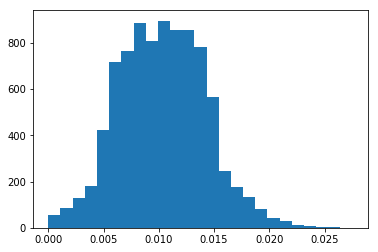

In [29]:
mask = (weights_df["pres"] < 0) &(weights_df["pres"] >= -100) 
plt.hist(weights_df["weights"][mask], bins=25)
plt.show()

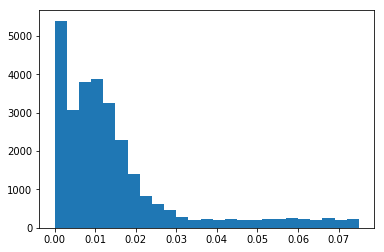

In [26]:
mask = (weights_df["pres"] > 0) &(weights_df["post"] > 0) 
plt.hist(weights_df["weights"][mask], bins=25)
plt.show()

In [27]:
numinhneurons = 5*5*2
neuroninputvector = np.zeros((numinhneurons, 5*5*2))


for neuronid in range(numinhneurons):
  mask = (weights_df["post"].values == neuronid) & (weights_df["pres"].values < 0) & (weights_df["pres"].values >= -5*5*2)
  neuroninputvector[neuronid, weights_df["pres"].values[mask]*-1 -1] = weights_df["weights"].values[mask]

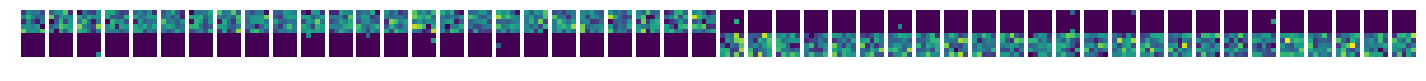

In [28]:
plt.figure(figsize=(25,100))
for neuronid in range(numinhneurons):
  plt.subplot(5*5*2, 5*5*2, 1+neuronid)
  plt.imshow(neuroninputvector[neuronid].reshape(5*2,5), interpolation="nearest", vmin=np.min(neuroninputvector), vmax=np.max(neuroninputvector))
  plt.axis('off')
plt.show()